In [1]:
# Import Python libraries
# This script was tested with zarr v2.13.6
import zarr
import numpy as np

# Function to open a Zarr file
def open_zarr(path: str) -> zarr.Group:
    store = (zarr.ZipStore(path, mode="r")
    if path.endswith(".zip")
    else zarr.DirectoryStore(path)
    )
    return zarr.group(store=store)


In [2]:
# Use the above function to open the cells Zarr file, which contains segmentation mask Zarr arrays
# 1823 od
# root = open_zarr("D:/drive/OneDrive - Case Western Reserve University/FILE/RESEARCH/Xenium_outputs/XeniumCornea/output_1823od/cells.zarr.zip")

# 1835 od
root = open_zarr("D:\drive\OneDrive - Case Western Reserve University/FILE/RESEARCH/Xenium_outputs/XeniumCornea/output_1823od/cells.zarr.zip")

# # 1782 od
# root = open_zarr("D:\drive\OneDrive - Case Western Reserve University/FILE/RESEARCH/Xenium_outputs/XeniumCornea/output-XETG00245__0034188__1782os__20240613__195055/cells.zarr.zip")

# # # 1782 od
# root = open_zarr("D:\drive\OneDrive - Case Western Reserve University/FILE/RESEARCH/Xenium_outputs/XeniumCornea/output-XETG00245__0034188__1792od__20240613__195055/cells.zarr.zip")



<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\xiwan\AppData\Local\Temp\ipykernel_18092\2534848112.py:6: SyntaxWarning: invalid escape sequence '\d'
  root = open_zarr("D:\drive\OneDrive - Case Western Reserve University/FILE/RESEARCH/Xenium_outputs/XeniumCornea/output_1823od/cells.zarr.zip")


In [3]:
# image_path = r"D:\drive\OneDrive - Case Western Reserve University\Project\ST_seg\backup_manual_seg\M_test_polygon_x16329_y14352_width800_seg.npy"
image_path = r"D:\CODE\Python_Projects\ST\ST_image\cropped_images\Finetune\1205_record\m_cropped_polygon_x12800_y11500_width800_seg.npy"
# image_path = r"D:\drive\OneDrive - Case Western Reserve University\Project\ST_seg\backup_manual_seg\M_test_polygon_x24752_y7717_width800_seg.npy"
# image_path = r"D:\drive\OneDrive - Case Western Reserve University\Project\ST_seg\backup_manual_seg\M_test_polygon_x15529_y5176_width800_seg.npy"


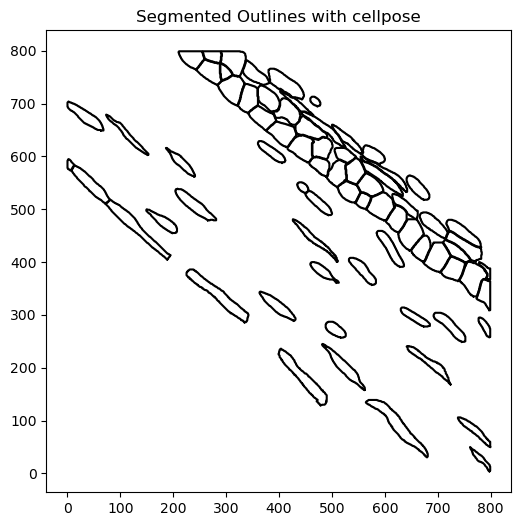

In [4]:
import numpy as np
from cellpose import plot, utils, io, models
import matplotlib.pyplot as plt

dat = np.load(image_path, allow_pickle=True).item()


# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
outlines

# Plot the outlines using LineCollection
fig, ax = plt.subplots(figsize=(6, 6))
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='black')

ax.set_title("Segmented Outlines with cellpose")
ax.axis('on')
plt.show()




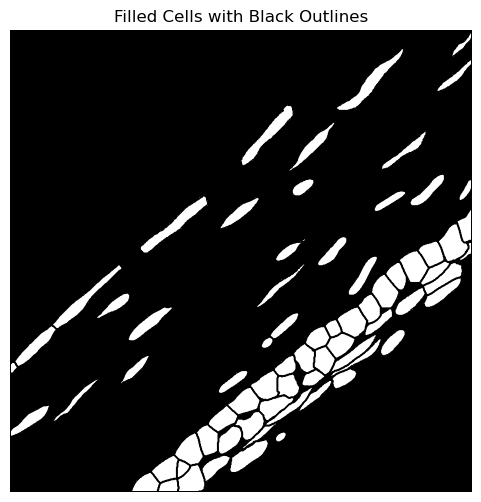

In [5]:
import numpy as np
from cellpose import plot, utils, io, models
import matplotlib.pyplot as plt
from skimage.draw import polygon

# Load the segmentation mask
dat = np.load(image_path, allow_pickle=True).item()

# Extract the masks and generate outlines
masks = dat['masks']
outlines = utils.outlines_list(masks)

# Create a blank binary image to fill in the cells
filled_image = np.zeros_like(masks, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image.shape)
    filled_image[rr, cc] = 255  # Fill with white (255) inside each contour

# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(filled_image, cmap='gray', interpolation='none')
for outline in outlines:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth=1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('off')
plt.show()

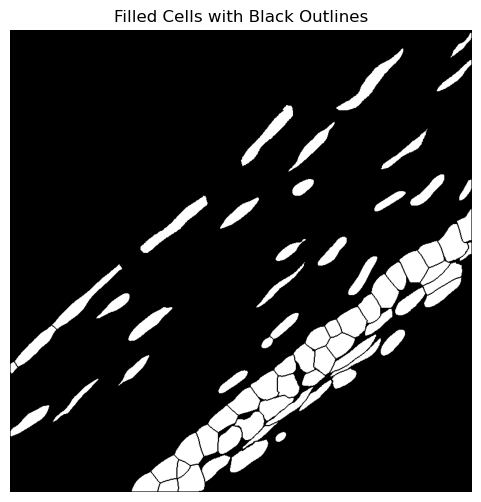

In [6]:
import numpy as np
from cellpose import utils
import matplotlib.pyplot as plt
from skimage.draw import polygon
from skimage.io import imsave  # To save the final binary image

# Load the segmentation mask
dat = np.load(image_path, allow_pickle=True).item()

# Extract the masks and generate outlines
masks = dat['masks']
outlines = utils.outlines_list(masks)

# Create a blank binary image to fill in the cells
final_image = np.zeros_like(masks, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], final_image.shape)
    final_image[rr, cc] = 255  # Fill with white (255) inside each contour

# Draw black outlines on top of the filled areas
for outline in outlines:
    outline = np.array(outline, dtype=np.int32)
    final_image[outline[:, 1], outline[:, 0]] = 0  # Draw black (0) outlines

# Display the final image
plt.figure(figsize=(6, 6))
plt.imshow(final_image, cmap='gray')
plt.title("Filled Cells with Black Outlines")
plt.axis('off')
plt.show()

# Save the result as a variable
final_result = final_image


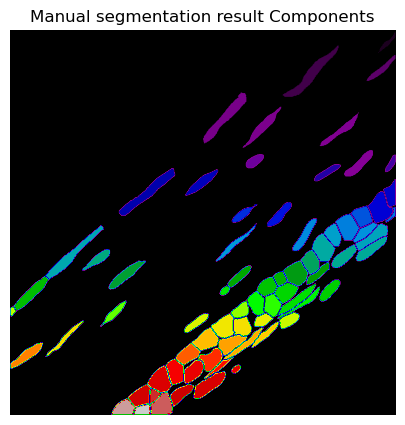

In [7]:
import cv2
# Apply connected components to label the connected regions
# It returns two values:
# num_labels: number of labels (including background)
# labels: image array where each connected component has a unique label
num_labels, labels_im = cv2.connectedComponents(final_result)

# Visualize the result using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(labels_im, cmap='nipy_spectral')
plt.title('Manual segmentation result Components')
plt.axis('off')
plt.show()


In [75]:
outlines

[array([[ 5,  0],
        [ 4,  1],
        [ 4,  2],
        [ 4,  3],
        [ 5,  4],
        [ 6,  5],
        [ 7,  6],
        [ 8,  7],
        [ 9,  8],
        [10,  8],
        [11,  9],
        [12, 10],
        [13, 11],
        [14, 11],
        [15, 12],
        [16, 13],
        [17, 14],
        [18, 15],
        [19, 16],
        [20, 17],
        [21, 18],
        [22, 19],
        [23, 20],
        [24, 21],
        [25, 22],
        [26, 23],
        [27, 23],
        [28, 24],
        [29, 24],
        [30, 24],
        [31, 25],
        [32, 25],
        [33, 26],
        [34, 26],
        [35, 26],
        [36, 27],
        [37, 27],
        [38, 27],
        [39, 28],
        [40, 28],
        [41, 29],
        [42, 29],
        [43, 28],
        [43, 27],
        [44, 26],
        [45, 25],
        [45, 24],
        [46, 23],
        [47, 22],
        [48, 21],
        [49, 20],
        [49, 19],
        [50, 18],
        [51, 17],
        [52, 16],
        [5

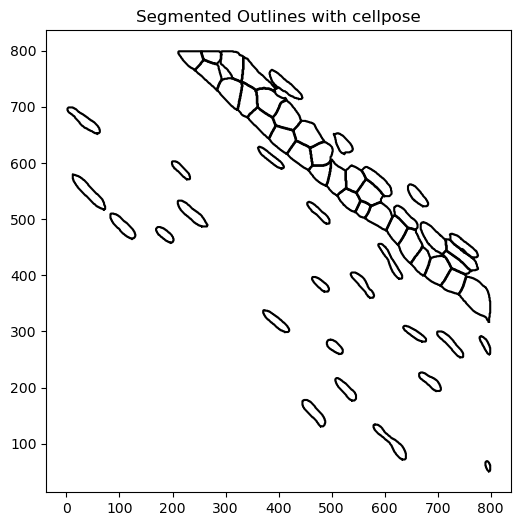

In [8]:

import numpy as np
from cellpose import plot, utils, io, models
import matplotlib.pyplot as plt

# HIL_image_path = r"D:\drive\OneDrive - Case Western Reserve University\Project\ST_seg\backup_manual_seg\HIL5_test_polygon_x16329_y14352_width800_seg.npy"

# HIL_image_path = r"D:\drive\OneDrive - Case Western Reserve University\Project\ST_seg\backup_manual_seg\HIL5_test_polygon_x24752_y7717_width800_seg.npy"

# HIL_image_path = r"D:\drive\OneDrive - Case Western Reserve University\Project\ST_seg\backup_manual_seg\HIL5_test_polygon_x15529_y5176_width800_seg.npy"

HIL_image_path = r"D:\CODE\Python_Projects\ST\ST_image\cropped_images\Finetune\1205_record\C_O2_cropped_polygon_x12800_y11500_width800_seg.npy"

image_path = HIL_image_path
dat = np.load(image_path, allow_pickle=True).item()


# plot image with outlines overlaid in red
outlines2 = utils.outlines_list(dat['masks'])
outlines = outlines2

# Plot the outlines using LineCollection
fig, ax = plt.subplots(figsize=(6, 6))
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='black')

ax.set_title("Segmented Outlines with cellpose")
ax.axis('on')
plt.show()



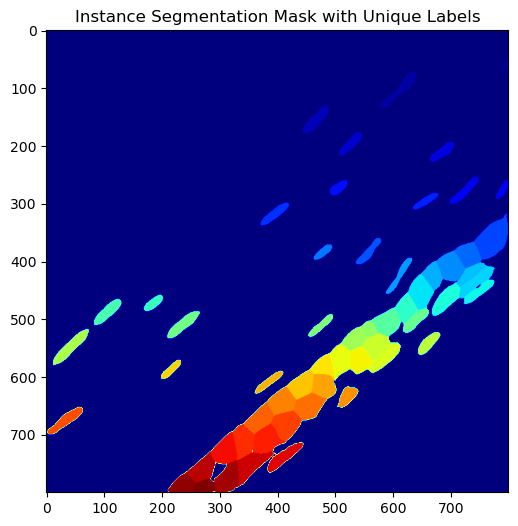

In [9]:

# Iterate over polygons and assign each one a unique label
# Create a blank canvas (e.g., 800x800)
from shapely.geometry import Polygon
from skimage.draw import polygon 
image_array = np.zeros((800, 800), dtype=np.uint8)


for label, poly_coords in enumerate(outlines, start=1):
    # Create a Shapely polygon from the coordinates
    polygon_obj = Polygon(poly_coords)

    # Extract x and y coordinates for drawing
    x_coords, y_coords = poly_coords[:, 0], poly_coords[:, 1]

    # Convert polygon coordinates to pixel coordinates and rasterize
    rr, cc = polygon(y_coords, x_coords, shape=image_array.shape)

    # Assign the unique label to the instance in the image (label 1, 2, 3, ...)
    image_array[rr, cc] = label

# Visualize the result
plt.figure(figsize=(6, 6))
plt.imshow(image_array, cmap='jet')
plt.title('Instance Segmentation Mask with Unique Labels')
plt.axis('on')
plt.show()


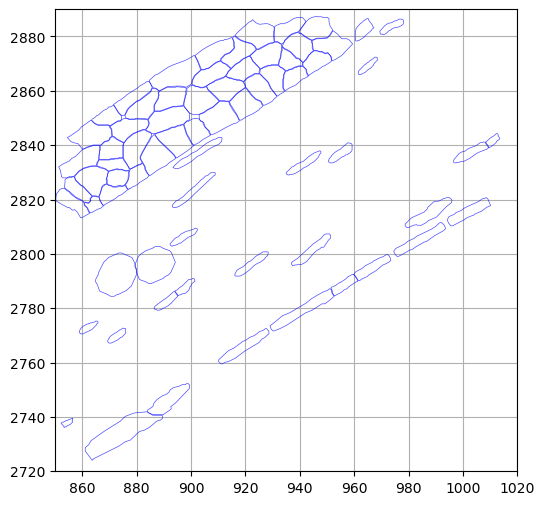

In [ ]:
# FROM XENIUM
'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Access the polygon set (replace '1' with '0' if needed)
polygon_set = root['polygon_sets']['1']

# Load data arrays
num_vertices = polygon_set['num_vertices'][:]
vertices = polygon_set['vertices'][:]

# # # Define the cropping region （region2） 
# x_min, x_max = 3470, 3470 + 170  # Adjust these values based on your dataset
# y_min, y_max = 3050, 3050 + 170  # Adjust these values based on your dataset

# # # Define the cropping region （region2） 
# x_min, x_max = 5260, 5260 + 170  # Adjust these values based on your dataset
# y_min, y_max = 1640, 1640 + 170  # Adjust these values based on your dataset

# # Define the cropping region （region2） 
x_min, x_max = 4000*0.2125, 4000*0.2125 + 170  # Adjust these values based on your dataset
y_min, y_max = 12800*0.2125, 12800*0.2125 + 170  # Adjust these values based on your dataset

# # # Define the cropping region （region2） 
# x_min, x_max = 10000*0.2125, 10000*0.2125 + 170  # Adjust these values based on your dataset
# y_min, y_max = 13500*0.2125, 13500*0.2125 + 170  # Adjust these values based on your dataset

# Collect polygons without flipping
all_polygons = []

for i in range(len(num_vertices)):
    n_vertices = num_vertices[i]
    if n_vertices < 3:
        continue  # Skip if not enough vertices to form a polygon

    # Extract x and y coordinates
    vertex_row = vertices[i, :2 * n_vertices]
    x_coords = vertex_row[::2]
    y_coords = vertex_row[1::2]

    # Check if the polygon is within the crop bounds
    if (x_coords.min() >= x_min and x_coords.max() <= x_max and
        y_coords.min() >= y_min and y_coords.max() <= y_max):
        
        # Close the polygon by appending the first point to the end
        x_coords = np.append(x_coords, x_coords[0])
        y_coords = np.append(y_coords, y_coords[0])

        # Combine x and y into coordinates
        polygon_coords = np.column_stack((x_coords, y_coords))
        all_polygons.append(polygon_coords)

# Create a LineCollection for efficient plotting
line_collection = LineCollection(all_polygons, linewidths=0.5, colors='blue', alpha=0.7)

# Plot all polygons
fig, ax = plt.subplots(figsize=(6, 6))

# Set equal aspect ratio to ensure the coordinate system looks square
ax.set_aspect('equal')

# Add grid for better visibility
ax.grid(True)

# Add the polygon collection to the plot
ax.add_collection(line_collection)

# Set the x and y limits to crop the plot
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])

# Show the plot
plt.show()
'''

In [43]:
all_polygons

[array([[ 888.25   , 2860.0376 ],
        [ 887.1875 , 2860.8877 ],
        [ 886.125  , 2861.1    ],
        [ 885.7    , 2861.5251 ],
        [ 884.6375 , 2863.4375 ],
        [ 884.6375 , 2863.8625 ],
        [ 886.7625 , 2865.7751 ],
        [ 887.825  , 2866.2002 ],
        [ 891.65   , 2868.75   ],
        [ 893.5625 , 2869.6    ],
        [ 897.60004, 2871.0876 ],
        [ 899.72504, 2872.1501 ],
        [ 901.     , 2873.     ],
        [ 901.42505, 2872.7876 ],
        [ 902.275  , 2871.0876 ],
        [ 903.55005, 2867.6875 ],
        [ 901.2125 , 2865.5625 ],
        [ 900.36255, 2863.8625 ],
        [ 900.15   , 2862.5876 ],
        [ 898.23755, 2861.3125 ],
        [ 896.325  , 2861.7375 ],
        [ 894.625  , 2861.7375 ],
        [ 891.22504, 2861.5251 ],
        [ 888.4625 , 2860.0376 ],
        [ 888.25   , 2860.0376 ],
        [ 888.25   , 2860.0376 ]], dtype=float32),
 array([[ 903.3375 , 2861.3125 ],
        [ 902.48755, 2861.5251 ],
        [ 901.6375 , 2861.7375 

In [ ]:
'''
# Scaling factors to map the original (x_min, x_max) and (y_min, y_max) to 0-800
scale_x = 800 / (x_max - x_min)
scale_y = 800 / (y_max - y_min)

# New list to store the scaled polygons
scaled_all_polygons = []

# Iterate over all polygons and apply the scaling transformation
for polygon_coords in all_polygons:
    # Separate x and y coordinates
    x_coords = polygon_coords[:, 0]
    y_coords = polygon_coords[:, 1]
    
    # Apply the scaling transformation to map coordinates to [0, 800]
    x_coords_scaled = ((x_coords - x_min) * scale_x)
    y_coords_scaled = ((y_coords - y_min) * scale_y)
    
    # Combine scaled x and y coordinates back into a single array
    scaled_polygon_coords = np.column_stack((x_coords_scaled, y_coords_scaled))
    
    # Append the scaled polygon to the new list
    scaled_all_polygons.append(scaled_polygon_coords)
'''

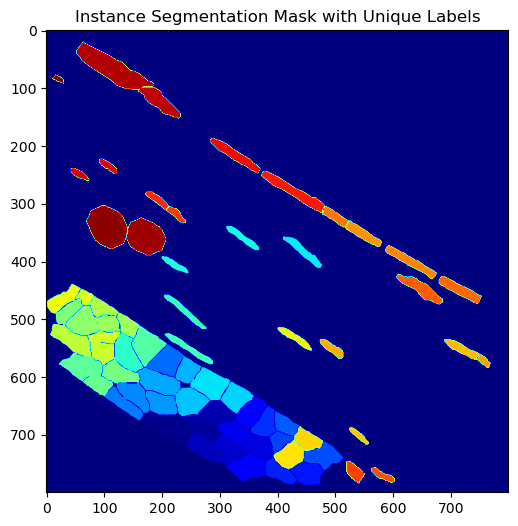

In [ ]:
'''
# Iterate over polygons and assign each one a unique label
# Create a blank canvas (e.g., 800x800)
from shapely.geometry import Polygon
from skimage.draw import polygon 
image_array = np.zeros((800, 800), dtype=np.uint8)


for label, poly_coords in enumerate(scaled_all_polygons, start=1):
    # Create a Shapely polygon from the coordinates
    polygon_obj = Polygon(poly_coords)

    # Extract x and y coordinates for drawing
    x_coords, y_coords = poly_coords[:, 0], poly_coords[:, 1]

    # Convert polygon coordinates to pixel coordinates and rasterize
    rr, cc = polygon(y_coords, x_coords, shape=image_array.shape)

    # Assign the unique label to the instance in the image (label 1, 2, 3, ...)
    image_array[rr, cc] = label

# Visualize the result
plt.figure(figsize=(6, 6))
plt.imshow(image_array, cmap='jet')
plt.title('Instance Segmentation Mask with Unique Labels')
plt.axis('on')
plt.show()
'''

In [10]:
import numpy as np
import pandas as pd
import cv2
from shapely.geometry import Polygon
from skimage.draw import polygon

def calculate_iou(ground_truth_mask, test_mask):
    # Calculate intersection and union
    intersection = np.logical_and(ground_truth_mask, test_mask)
    union = np.logical_or(ground_truth_mask, test_mask)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0
    return iou

def calculate_precision(ground_truth_mask, test_mask):
    # Calculate true positives and false positives
    true_positives = np.sum(np.logical_and(test_mask, ground_truth_mask))
    predicted_positives = np.sum(test_mask)
    precision = true_positives / predicted_positives if predicted_positives > 0 else 0
    return precision

def calculate_recall(ground_truth_mask, test_mask):
    # Calculate true positives and false negatives
    true_positives = np.sum(np.logical_and(test_mask, ground_truth_mask))
    actual_positives = np.sum(ground_truth_mask)
    recall = true_positives / actual_positives if actual_positives > 0 else 0
    return recall

ious = []
precisions = []
recalls = []

iou_threshold = 0.5
matched_test_instances = set()  # To track test instances that have been matched

comparison_data = []

# Loop over each instance in the ground truth
for label in range(1, num_labels):  # num_labels from connectedComponents
    # Create a binary mask for the current label (instance) in the ground truth
    ground_truth_mask = (labels_im == label).astype(np.uint8)
    
    best_iou = 0  # Track the best IoU for the current ground truth instance
    best_test_label = None  # Track which test label gives the best IoU
    
    print(f"\nProcessing ground truth instance {label}...")
    
    # !!   scaled_all_polygons
    # Loop over the test set polygons (each one is already labeled in your test set)
    for test_label, poly_coords in enumerate(outlines, start=1):
        if test_label in matched_test_instances:
            # Skip this test instance if it has already been matched
            continue
        
        # Create binary mask for the current test set polygon (instance)
        test_mask = np.zeros_like(ground_truth_mask)
        x_coords, y_coords = poly_coords[:, 0], poly_coords[:, 1]
        rr, cc = polygon(y_coords, x_coords, shape=test_mask.shape)
        test_mask[rr, cc] = 1
        
        # Calculate IoU between the current ground truth instance and test set instance
        iou = calculate_iou(ground_truth_mask, test_mask)



        # Print IoU to monitor progress
        print(f"  IoU between ground truth {label} and test {test_label}: {iou:.4f}")
        
        # If IoU is above the threshold and better than the current best, record it
        if iou > iou_threshold and iou > best_iou:
            best_iou = iou
            best_test_label = test_label

            precision = calculate_precision(ground_truth_mask, test_mask)
            recall = calculate_recall(ground_truth_mask, test_mask)

    # If we found a match (IoU > 0.50), append it to the list
    if best_test_label is not None:
        print(f"  Best match for ground truth {label} is test {best_test_label} with IoU {best_iou:.4f}")
        matched_test_instances.add(best_test_label)
        ious.append(best_iou)
        precisions.append(precision)
        recalls.append(recall)

        # Append the comparison data
        comparison_data.append({
            'Ground Truth Instance': label,
            'Cellpose Segmentation Instance': best_test_label,
            'IoU': best_iou,
            'Precision': precision,
            'Recall': recall
        })
        
    else:
        print(f"  No match found for ground truth {label} (IoU > {iou_threshold})")

# Save the DataFrame to a CSV file
comparison_df = pd.DataFrame(comparison_data)
comparison_df.to_csv('iou_comparison_results.csv', index=False)

# Display the first few rows of the DataFrame
print(comparison_df.head())

# Calculate mean IoU if we have any matches
if ious:
    mean_iou = np.mean(ious)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    print(f"\nMean IoU: {mean_iou:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
else:
    print("\nNo matched instances found with IoU > 0.50")



Processing ground truth instance 1...
  IoU between ground truth 1 and test 1: 0.0000
  IoU between ground truth 1 and test 2: 0.0000
  IoU between ground truth 1 and test 3: 0.0000
  IoU between ground truth 1 and test 4: 0.0000
  IoU between ground truth 1 and test 5: 0.0000
  IoU between ground truth 1 and test 6: 0.0000
  IoU between ground truth 1 and test 7: 0.0000
  IoU between ground truth 1 and test 8: 0.0000
  IoU between ground truth 1 and test 9: 0.0000
  IoU between ground truth 1 and test 10: 0.0000
  IoU between ground truth 1 and test 11: 0.0000
  IoU between ground truth 1 and test 12: 0.0000
  IoU between ground truth 1 and test 13: 0.0000
  IoU between ground truth 1 and test 14: 0.0000
  IoU between ground truth 1 and test 15: 0.0000
  IoU between ground truth 1 and test 16: 0.0000
  IoU between ground truth 1 and test 17: 0.0000
  IoU between ground truth 1 and test 18: 0.0000
  IoU between ground truth 1 and test 19: 0.0000
  IoU between ground truth 1 and test 2

In [35]:
# Print the number of distinct labels (polygons) assigned
num_cells_manual = num_labels  # The last label is the number of cells
print(f"Number of cells manual (polygons) detected: {num_cells_manual}")

Number of cells manual (polygons) detected: 73


In [12]:

# comparison_df.to_csv('result/comparison_df_1835OD_HIL.csv', index=False)
# comparison_df

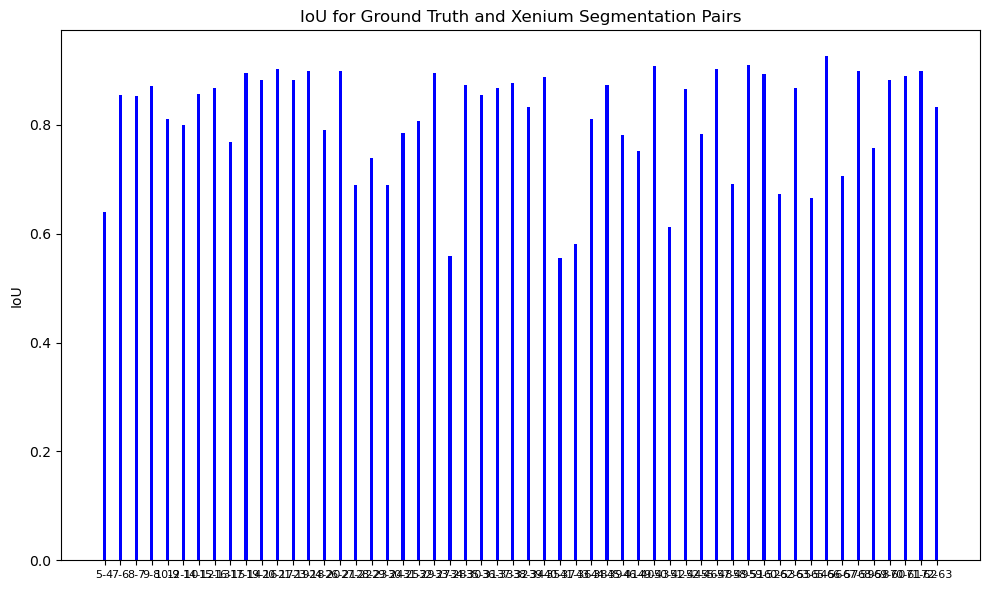

In [36]:
import matplotlib.pyplot as plt

# Create a combined label for the x-axis by joining Ground Truth Instance and Test Instance
comparison_df['Instance_Pair'] = comparison_df['Ground Truth Instance'].astype(str) + '-' + comparison_df['Cellpose Segmentation Instance'].astype(str)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the bar plot with increased width of the bars
plt.bar(comparison_df['Instance_Pair'], comparison_df['IoU'], color='blue', width=0.2)

# # Hide the x-axis labels
# plt.gca().xaxis.set_visible(False)

# Label the y-axis
plt.ylabel('IoU')

# Add a title
plt.title('IoU for Ground Truth and Xenium Segmentation Pairs')
plt.xticks(fontsize=8)

# Show the plot
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()


In [184]:
# scaled_all_polygons = outlines

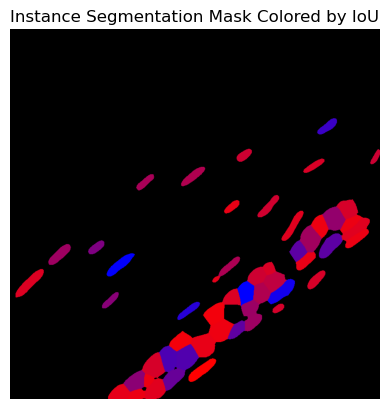

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from skimage.draw import polygon
from matplotlib.colors import LinearSegmentedColormap

# Normalize IoU values between 0 and 1 for color mapping
norm_iou = (comparison_df['IoU'] - comparison_df['IoU'].min()) / (comparison_df['IoU'].max() - comparison_df['IoU'].min())

# Custom red to blue colormap
colors = [(0, 0, 1), (1, 0, 0)]  # Red -> Blue
colormap = LinearSegmentedColormap.from_list("red_to_blue", colors)

# Create a blank canvas (e.g., 800x800)
image_array = np.zeros((800, 800, 3), dtype=np.float32)

# Iterate over each polygon and assign a color based on IoU
for index, row in comparison_df.iterrows():
    # Find the corresponding polygon coordinates from your data
    # Xenium
    label = row['Cellpose Segmentation Instance']
    
    # Check if the label is within the bounds of scaled_all_polygons
    if label >= len(outlines) or label < 0:
        print(f"Warning: Label {label} is out of bounds for scaled_all_polygons")
        continue  # Skip this entry if out of bounds
    
    poly_coords = outlines[label]
    
    # Create a Shapely polygon from the coordinates
    polygon_obj = Polygon(poly_coords)
    
    # Extract x and y coordinates for drawing
    x_coords, y_coords = poly_coords[:, 0], poly_coords[:, 1]
    
    # Convert polygon coordinates to pixel coordinates and rasterize
    rr, cc = polygon(y_coords, x_coords, shape=image_array.shape[:2])
    
    # Get the color for the current IoU value
    color = colormap(norm_iou[index])
    
    # Apply the color to the pixels (rr, cc)
    image_array[rr, cc, 0] = color[0]  # Red channel
    image_array[rr, cc, 1] = color[1]  # Green channel
    image_array[rr, cc, 2] = color[2]  # Blue channel

# Visualize the result
plt.imshow(image_array)
plt.title('Instance Segmentation Mask Colored by IoU')
plt.axis('off')
plt.show()


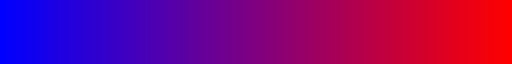

In [186]:
colormap